<font size=6><b> lec09_2. 군집분석(Clustering) - DBSCAN

* 군집 분석 
    * 데이터를 비슷한 것끼리 그룹을 묶는 것
    * 데이터의 전반적 특징 파악에 유용
    * 답지(target)이 없는 비지도학습(unsupervised learning)


* https://scikit-learn.org/0.15/auto_examples/cluster/plot_cluster_comparison.html
* ref : https://datascienceschool.net/03%20machine%20learning/16.01%20%EA%B5%B0%EC%A7%91%ED%99%94.html

<img src="https://scikit-learn.org/0.15/_images/plot_cluster_comparison_0011.png">

In [1]:
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.cluster import DBSCAN

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score 

import warnings
warnings.filterwarnings(action='ignore')
sns.set()

# Data Load

In [2]:
dataset = load_iris()
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df['target'] = dataset['target']
df.columns = ['sl', 'sw', 'pl','pw', 'target']
df.head()

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# DBSCAN

<img src= "https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-29.png" width=400>

* class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

## 스케일링

In [3]:
y = df['target']
X = df.drop(['target'], axis=1)

pca = PCA(n_components=2, random_state=1234)
X_pca = pca.fit_transform(X)

scaler = StandardScaler()
X_pca_scaler = scaler.fit_transform(X_pca)
pca_df = pd.DataFrame(X_pca_scaler, columns=["pc1","pc2"])


## 최적의 eps, nodes 찾기

In [4]:
import math
def calculate_kn_distance(X,k):
    kn_distance = []
    for i in range(len(X)):
        eucl_dist = []
        for j in range(len(X)):
            eucl_dist.append(math.sqrt(((X[i,0] - X[j,0]) ** 2) +  ((X[i,1] - X[j,1]) ** 2)))
        eucl_dist.sort()
        kn_distance.append(eucl_dist[k])
    return kn_distance

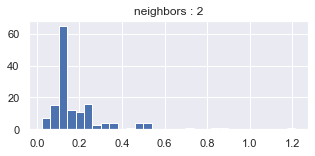

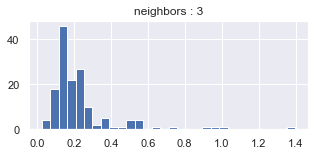

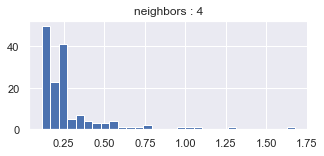

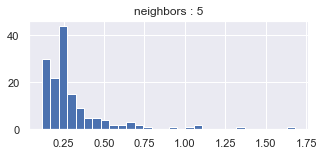

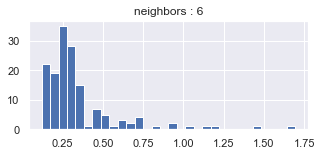

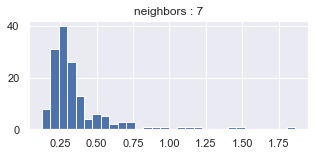

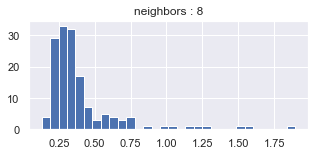

In [5]:
for n in [2,3,4,5,6,7,8]:
    eps_dist = calculate_kn_distance(pca_df.values, n)
    plt.figure(figsize=(5,2))
    plt.hist(eps_dist, bins=30)
    plt.title(f"neighbors : {n}")
    plt.show()

* ref : https://lucy-the-marketer.kr/ko/growth/%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81%EA%B3%BC-dbscan

<img src= "https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-32.png" width=300>


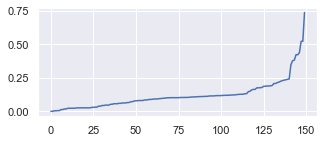

In [6]:
res =  NearestNeighbors(n_neighbors=5).fit(pca_df)
distance, indices = res.kneighbors()
distance = np.sort(distance, axis=0)
plt.figure(figsize=(5,2))
plt.plot(distance[:, 0])
plt.show()
plt.close()

## 군집 & 평가 검증

=3==3==3==3==3==3==3==3==3==3==3==3==3==3==3==3==3==3==3==3=


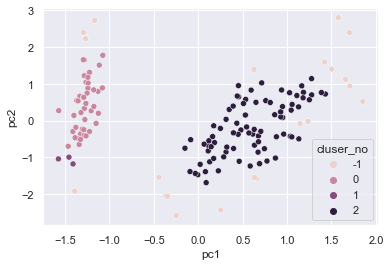

전체 silhouette : 0.3172
target      0   1   2
cluser_no            
-1          4   5  12
 0         43   0   0
 1          3   0   0
 2          0  45  38
=4==4==4==4==4==4==4==4==4==4==4==4==4==4==4==4==4==4==4==4=


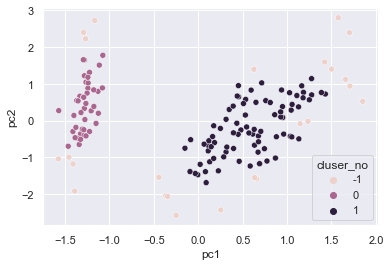

전체 silhouette : 0.4097
target      0   1   2
cluser_no            
-1          7   5  12
 0         43   0   0
 1          0  45  38
=5==5==5==5==5==5==5==5==5==5==5==5==5==5==5==5==5==5==5==5=


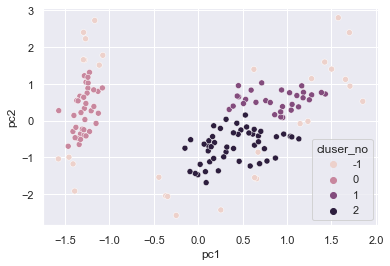

전체 silhouette : 0.3535
target      0   1   2
cluser_no            
-1         11   6  13
 0         39   0   0
 1          0  11  20
 2          0  33  17
=6==6==6==6==6==6==6==6==6==6==6==6==6==6==6==6==6==6==6==6=


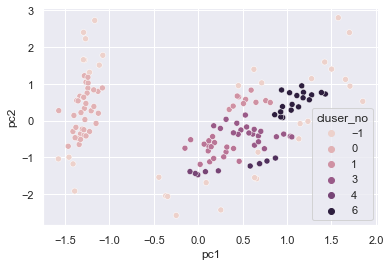

전체 silhouette : 0.2240
target      0   1   2
cluser_no            
-1         12   9  14
 0         38   0   0
 1          0   9   1
 2          0  17   0
 3          0  10  11
 4          0   5   0
 5          0   0   5
 6          0   0  19
=7==7==7==7==7==7==7==7==7==7==7==7==7==7==7==7==7==7==7==7=


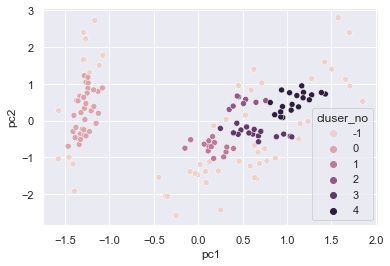

전체 silhouette : 0.1241
target      0   1   2
cluser_no            
-1         13  22  20
 0         37   0   0
 1          0  14   0
 2          0   8   0
 3          0   6  10
 4          0   0  20
=8==8==8==8==8==8==8==8==8==8==8==8==8==8==8==8==8==8==8==8=


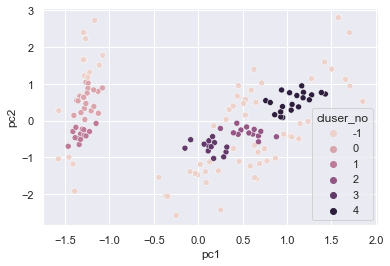

전체 silhouette : 0.0543
target      0   1   2
cluser_no            
-1         15  30  23
 0         21   0   0
 1         14   0   0
 2          0   6   7
 3          0  13   0
 4          0   1  20


In [7]:

# 0.2 0.4 0.5 0.6 0.8    
# 3,4,5,6,7,8
for node in [3,4,5,6,7,8]:
    
    print(f"={node}="*20)
    # dbscan = KMeans(n_clusters=k, random_state=1234)
    dbscan = DBSCAN(eps=0.25, min_samples=node)
    pred = dbscan.fit_predict(pca_df[["pc1", "pc2"]])   #---------- y가 없다
    # pred, y

    pred_df = pd.DataFrame({"cluser_no":pred,  "target":y})
    pred_df["pc1"] = pca_df["pc1"]
    pred_df["pc2"] = pca_df["pc2"]
    pred_df.head()

    sns.scatterplot(x="pc1", y="pc2", data=pred_df, hue="cluser_no")
    plt.show()
    plt.close()
    
    sil_coef = silhouette_samples(pred_df[['pc1','pc2']], pred_df["cluser_no"])
    pred_df["sil_coef"] = sil_coef

    print(f"전체 silhouette : {pred_df['sil_coef'].mean():.4f}") 
   
    ## 평가 & 검증
    cross_df = pd.crosstab(pred_df['cluser_no'], pred_df['target'])
    print(cross_df)
    
    
